# Training

In [9]:
from pathlib import Path
from dataclasses import dataclass
import sys

# Add the root project directory to the Python path
ROOT = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(ROOT))
from configs.path_config import EXTRACTED_DATA_DIR, WEIGHTS_DIR, FEATURES
from src.processing import dataset
from models import lstm_model
from src import utils

#### Create the train data loader

In [10]:
folder_path = EXTRACTED_DATA_DIR / 'group_alvbrodel'
data = dataset.StrainDataset(folder_path, FEATURES, sequence_length=128, start_idx=11112, test_size=0.3)
train_loader = data.train_dataloader

c:\Users\hpl886\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
c:\Users\hpl886\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
c:\Users\hpl886\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
c:\Users\hpl886\Documents\Exjobb\src\processing\preprocessing.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
c:\Users\hpl

#### Train the model

In [11]:
# Model parameters
input_dim = data.feature_count
print(f"Input dimension: {input_dim}")
hidden_dim=128
num_layers=2
num_epochs=10
learning_rate=0.01
dropout = 0.3
# weight_decay = 0


# Location and name for saving the model
model_folder = WEIGHTS_DIR
# model_name = f'lstm_model_{input_dim}_{hidden_dim}_{num_layers}_{num_epochs}_{learning_rate}_{dropout}_{weight_decay}.pth'
model_name = f'lstm_model_{input_dim}_{hidden_dim}_{num_layers}_{num_epochs}_{learning_rate}_{dropout}.pth'

# Create the model and train it
model = lstm_model.LSTMModel(input_dim, hidden_dim, num_layers, dropout)
# losses, prediction = lstm_model.training_loop(model, train_loader, num_epochs, weight_decay, learning_rate, model_folder, model_name)
losses, prediction = lstm_model.training_loop(model, train_loader, num_epochs, learning_rate, model_folder, model_name)

Input dimension: 24


Epoch 1/10: 100%|██████████| 331/331 [00:22<00:00, 15.04batch/s]



Epoch 1/10, Average Loss: 0.014915



Epoch 2/10: 100%|██████████| 331/331 [00:21<00:00, 15.30batch/s]



Epoch 2/10, Average Loss: 0.003479



Epoch 3/10: 100%|██████████| 331/331 [00:22<00:00, 14.84batch/s]



Epoch 3/10, Average Loss: 0.002142



Epoch 4/10: 100%|██████████| 331/331 [00:21<00:00, 15.62batch/s]



Epoch 4/10, Average Loss: 0.001461



Epoch 5/10: 100%|██████████| 331/331 [00:21<00:00, 15.33batch/s]



Epoch 5/10, Average Loss: 0.001159



Epoch 6/10: 100%|██████████| 331/331 [00:21<00:00, 15.72batch/s]



Epoch 6/10, Average Loss: 0.001066



Epoch 7/10: 100%|██████████| 331/331 [00:22<00:00, 14.47batch/s]



Epoch 7/10, Average Loss: 0.000991



Epoch 8/10: 100%|██████████| 331/331 [00:23<00:00, 14.37batch/s]



Epoch 8/10, Average Loss: 0.000930



Epoch 9/10: 100%|██████████| 331/331 [00:22<00:00, 14.99batch/s]



Epoch 9/10, Average Loss: 0.000914



Epoch 10/10: 100%|██████████| 331/331 [00:21<00:00, 15.38batch/s]


Epoch 10/10, Average Loss: 0.000891



#### Plot the epoch losses

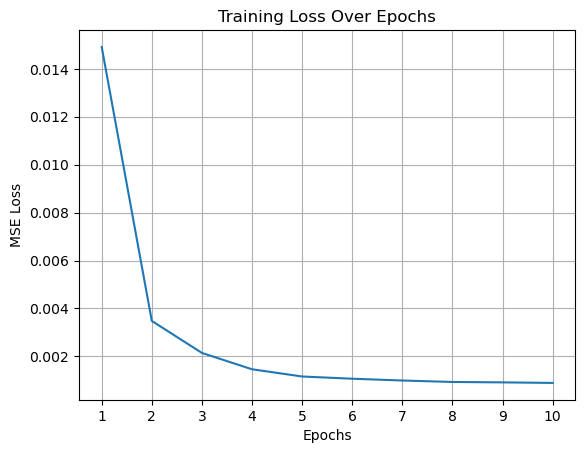

In [12]:
utils.plot_epochs_loss(num_epochs, losses)